In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
df = pd.read_csv('../data/train.csv')
df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [5]:
"""
item: 품목 코드 TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
corporation : 유통 법인 코드 법인 A부터 F 존재
location : 지역 코드 J : 제주도 제주시 S : 제주도 서귀포시
supply(kg) : 유통된 물량, kg 단위
price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위
"""
# 목표 : price 예측

'\nitem: 품목 코드 TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추\ncorporation : 유통 법인 코드 법인 A부터 F 존재\nlocation : 지역 코드 J : 제주도 제주시 S : 제주도 서귀포시\nsupply(kg) : 유통된 물량, kg 단위\nprice(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위\n'

In [6]:
df.describe()

,supply(kg),price(원/kg)
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [9]:
df['item'].value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [10]:
df.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [12]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: xlabel='item', ylabel='price(원/kg)'>

/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


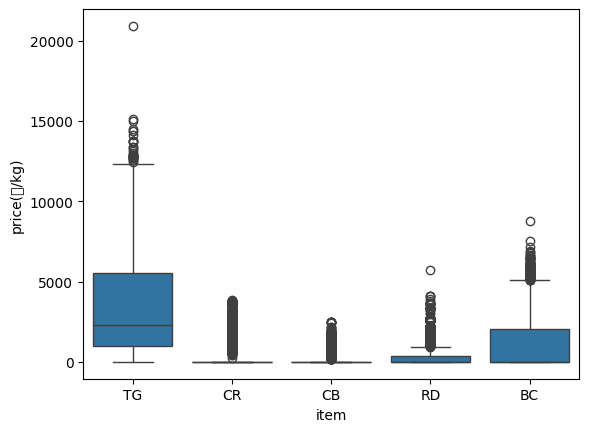

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price(원/kg)',data=df)


<Axes: xlabel='corporation', ylabel='price(원/kg)'>

/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


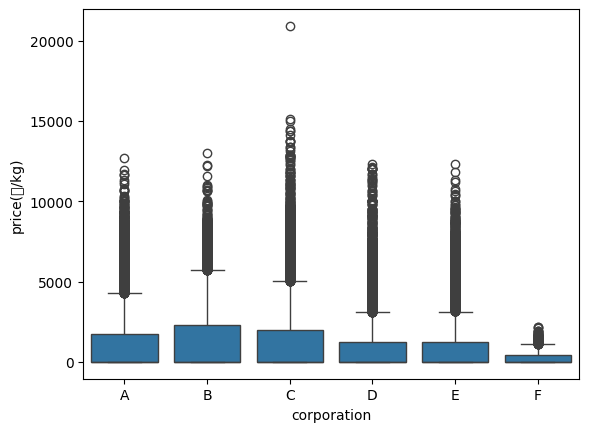

In [14]:
sns.boxplot(x='corporation',y='price(원/kg)',data=df)

<Axes: xlabel='location', ylabel='price(원/kg)'>

/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/home/yth1133/miniconda3/envs/jeju/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


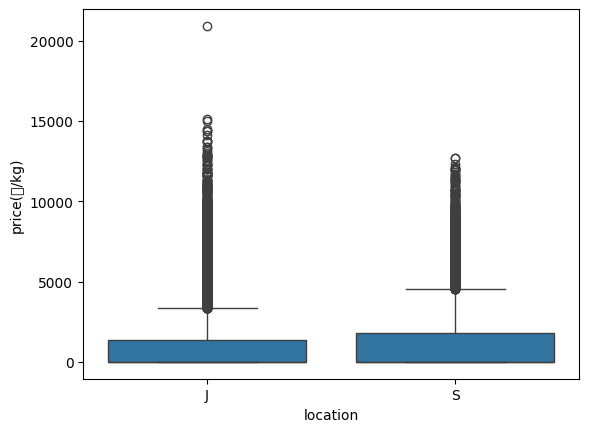

In [15]:
sns.boxplot(x='location',y='price(원/kg)',data=df)

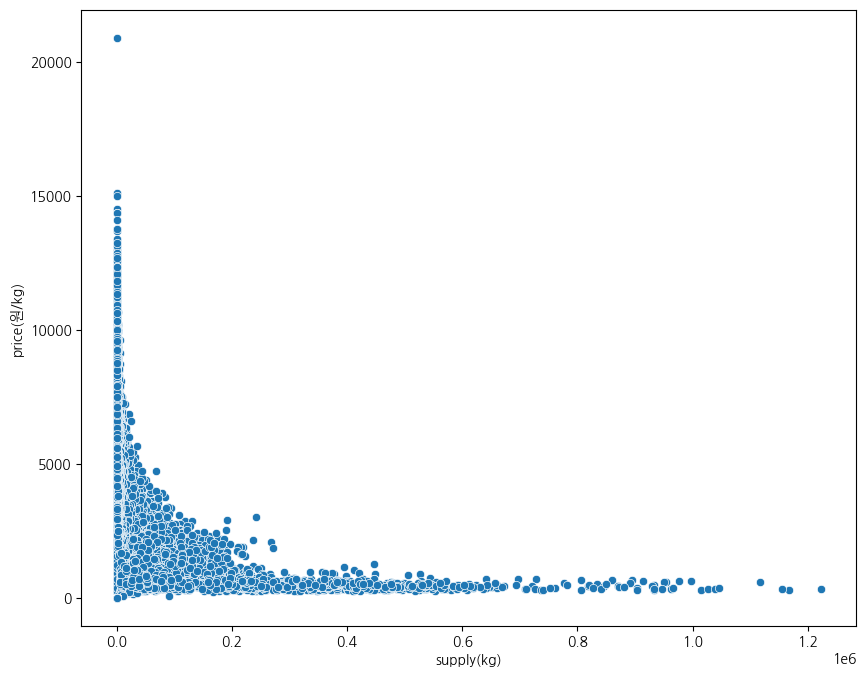

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)');

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

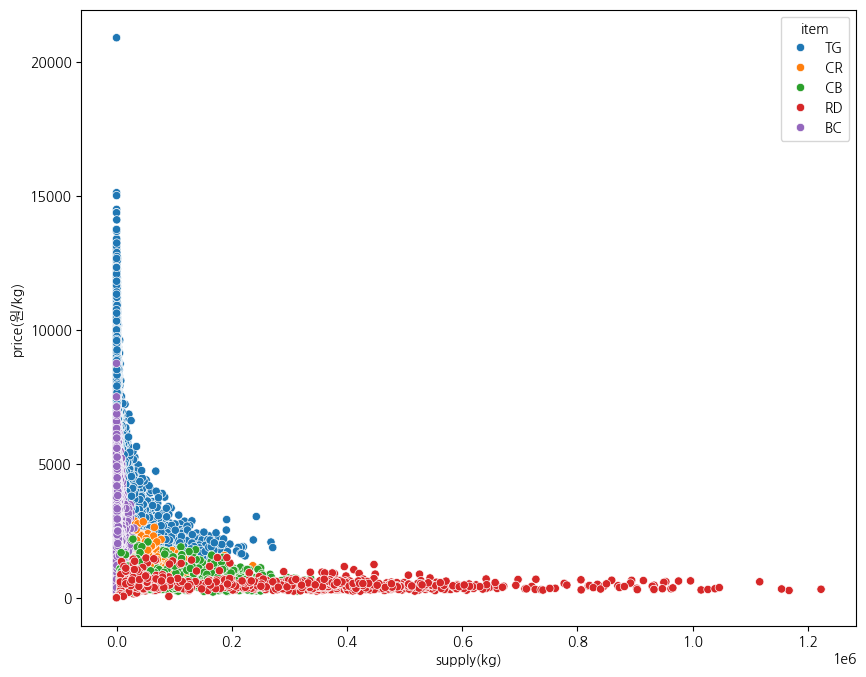

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='item')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

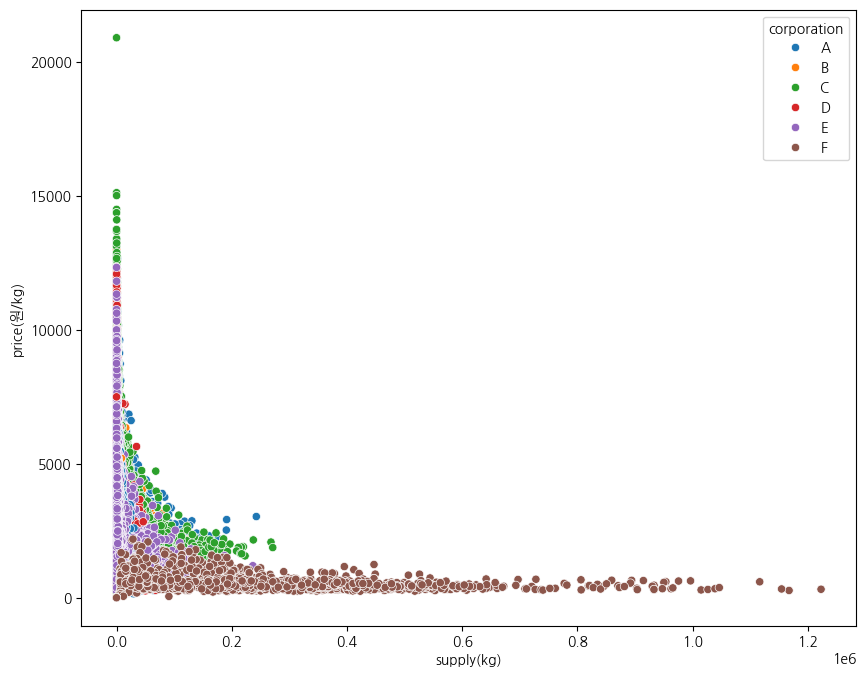

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='corporation')

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

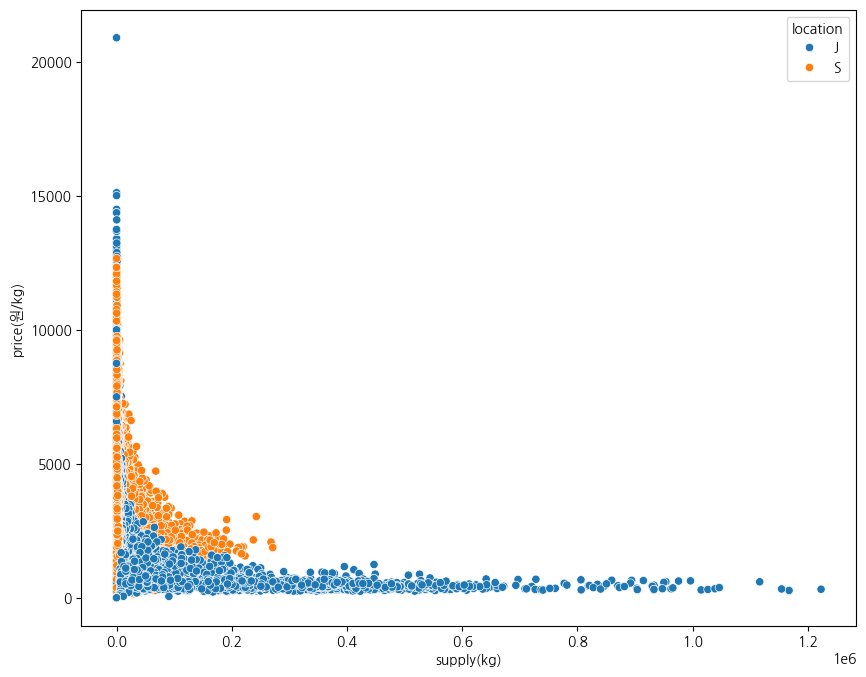

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='supply(kg)',y='price(원/kg)',hue='location')

<Figure size 1000x800 with 0 Axes>

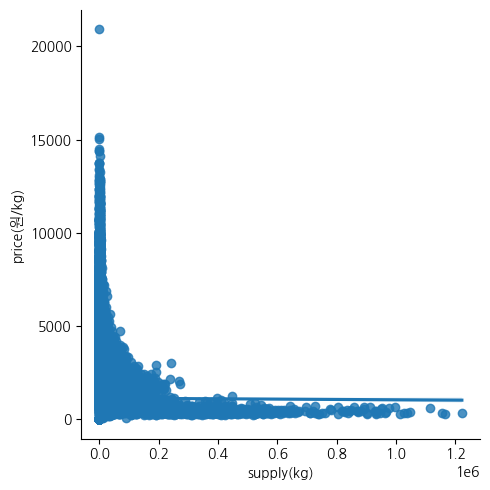

In [23]:
plt.figure(figsize=(10,8))
sns.lmplot(data=df,x ='supply(kg)',y='price(원/kg)')

In [25]:
df.groupby('item')['price(원/kg)'].sum()

item
BC    12476065.0
CB     1158905.0
CR     2911721.0
RD     2279304.0
TG    48392442.0
Name: price(원/kg), dtype: float64

In [26]:
df.groupby('location')['price(원/kg)'].sum()


location
J    37213110.0
S    30005327.0
Name: price(원/kg), dtype: float64

In [27]:
df.groupby('corporation')['price(원/kg)'].sum()


corporation
A    15649343.0
B    11763166.0
C    13418396.0
D    12490909.0
E    13107338.0
F      789285.0
Name: price(원/kg), dtype: float64

In [28]:
df[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [31]:
type(df['timestamp'][0])

str

In [34]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


/tmp/ipykernel_5803/2967097163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price(원/kg)',ax=axes[0],palette='husl')


<Axes: xlabel='month', ylabel='price(원/kg)'>

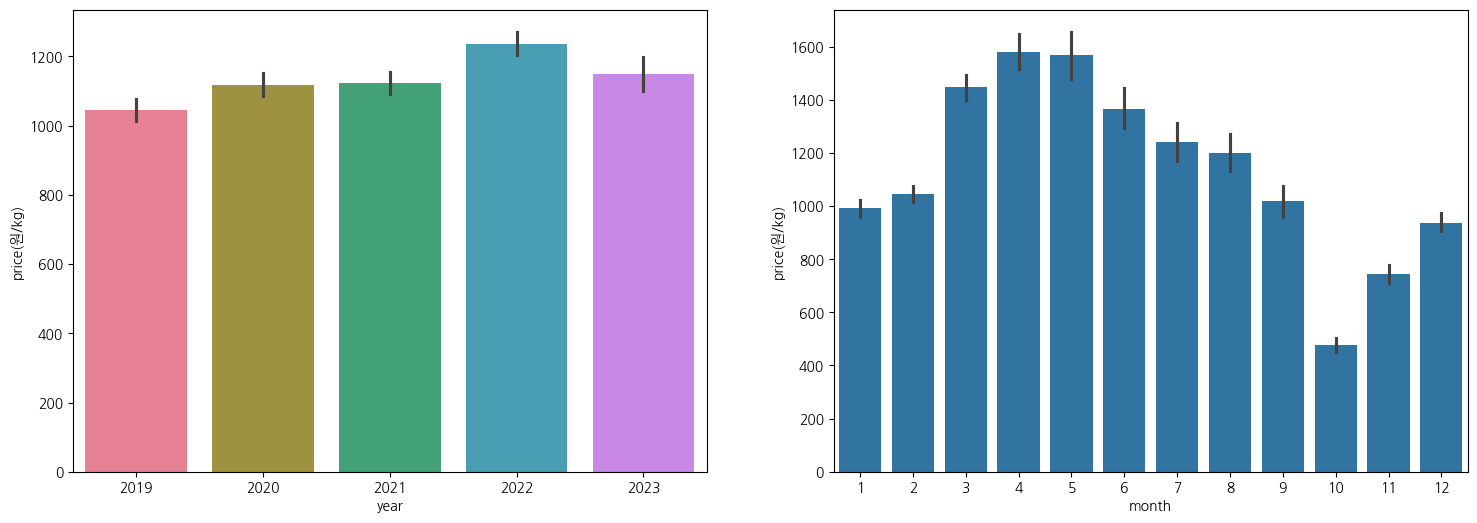

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=df,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=df,x='month',y='price(원/kg)',ax=axes[1])

In [36]:
### https://github.com/hughxx/tsf-new-paper-taste
###  PatchMixer, SegRNN, iTransformer 로 확인